# Imports

In [1]:
import warnings

import pandas as pd

from functions.loading import load_data

from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

# Parameters definition

In [2]:
# paths
path_rawdata = 'data/raw_data/'
path_models = 'models/'
path_benchmark = 'benchmark/'
path_results = 'results/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/'
path_plot = 'results/plot/'

# Training parameters
targets = ["cf1_log","cf2_log","cf3_log", "cf123_log"]
models = {
        "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "seed":0,
    "n_iter":10,
    "extended_features": [
            "revenue_log",
            "employees_log",
            "asset_log",
            "nppe_log",
            "capex_log",
            "age",
            "cap_inten",
            "gmar",
            "leverage",
            "price",
            "fuel_intensity",
            "fiscal_year",
            "energy_consumed_log",
            "energy_produced_log",
            "intan_log",
            "accu_dep_log",
            "cogs_log",
        ],
    "selec_sect":["gics_sub_ind", "gics_ind", "gics_group"],
    "cross_val": False,
}
restricted_features=False
save=True,

# Results containers
summary_final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

# Data Loading 

In [3]:
preprocessed_dataset = load_data(path_rawdata, save=True)

# Training pipeline 

INFO:functions.training_pipeline:Training for target: cf1_log


Using pre created preprocessed files


INFO:functions.training_pipeline:Preprocessing done
INFO:functions.training_pipeline:Training model: xgboost
INFO:functions.training_pipeline:Training model: catboost
INFO:functions.training_pipeline:Training model: lgbm
INFO:functions.training_pipeline:Modelisation done
INFO:functions.training_pipeline:Elapsed time for target cf1_log: 38.72 seconds
INFO:functions.training_pipeline:Training for target: cf2_log


Using pre created preprocessed files


INFO:functions.training_pipeline:Preprocessing done
INFO:functions.training_pipeline:Training model: xgboost
INFO:functions.training_pipeline:Training model: catboost
INFO:functions.training_pipeline:Training model: lgbm
INFO:functions.training_pipeline:Modelisation done
INFO:functions.training_pipeline:Elapsed time for target cf2_log: 25.44 seconds


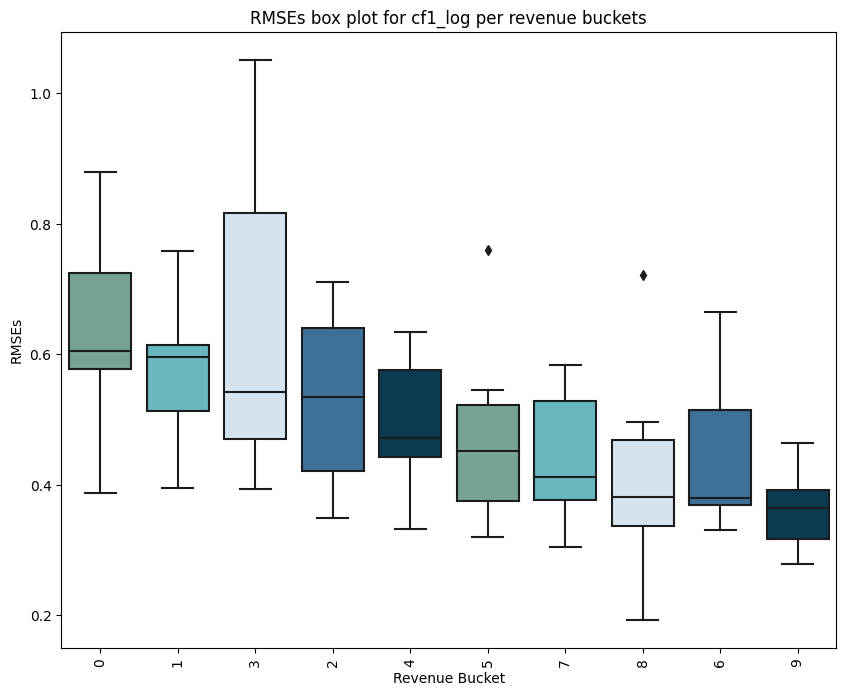

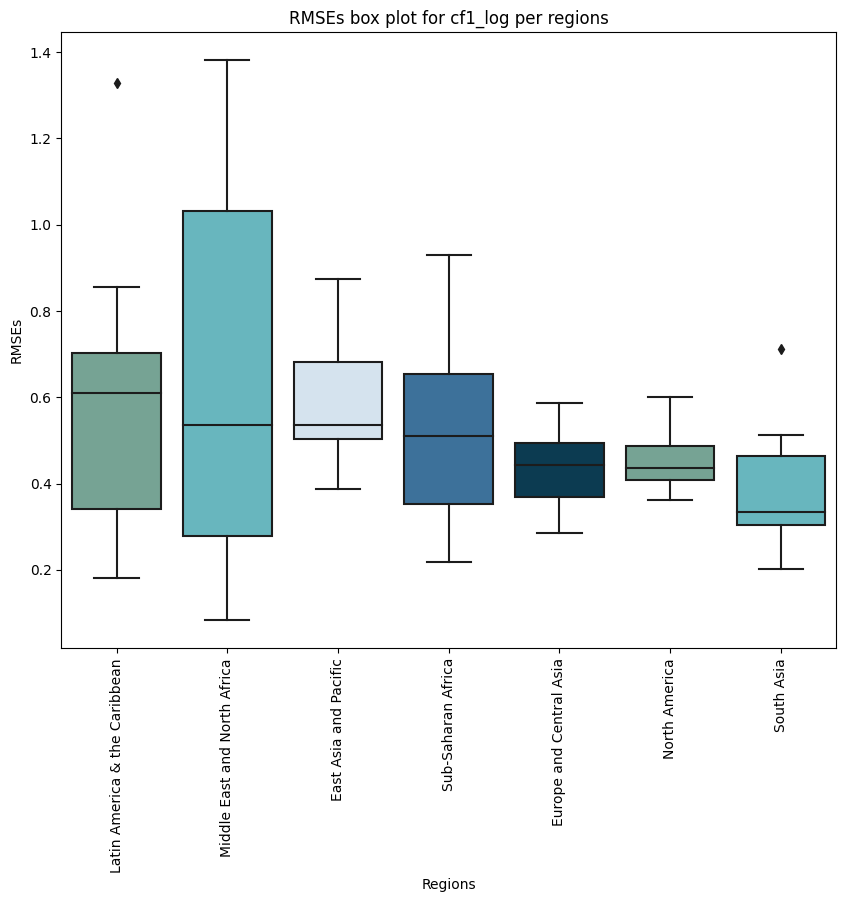

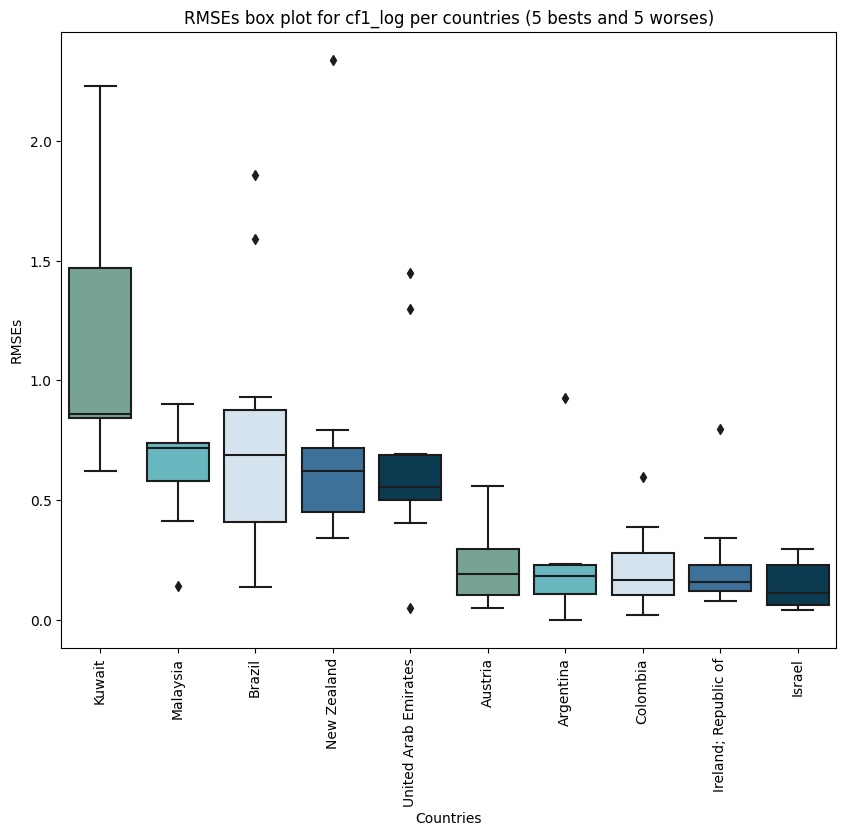

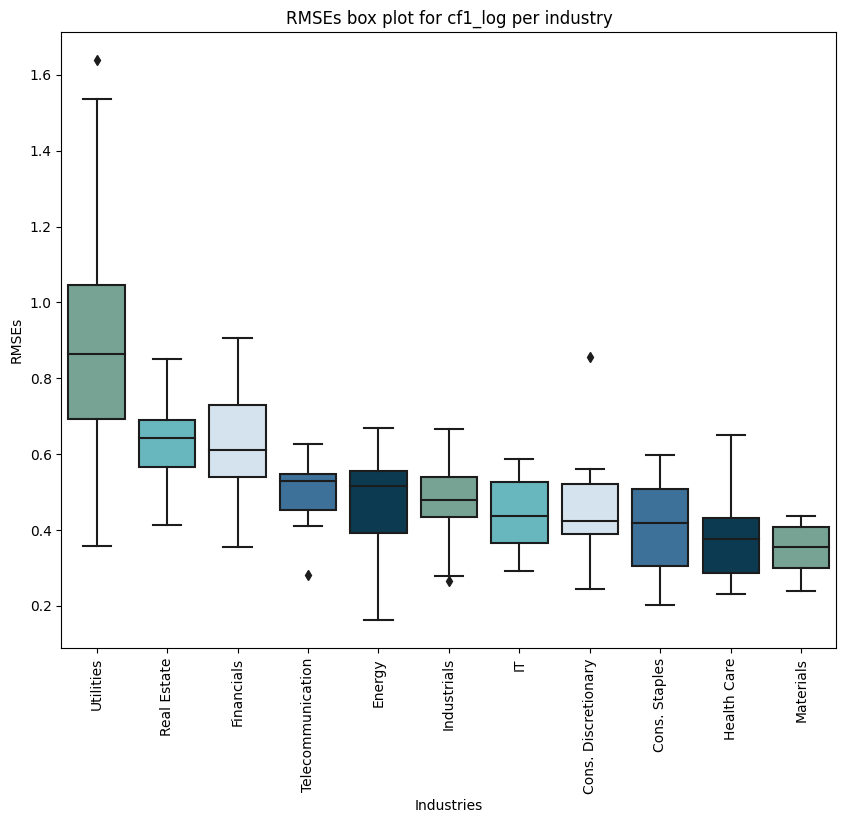

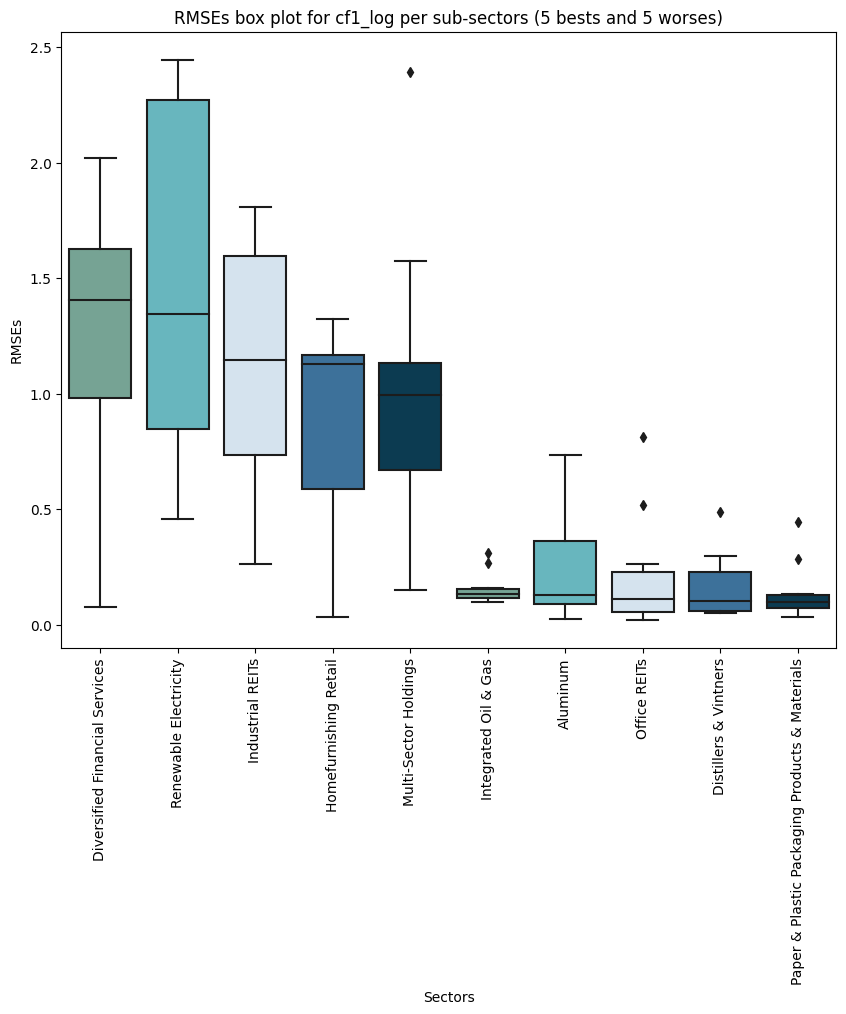

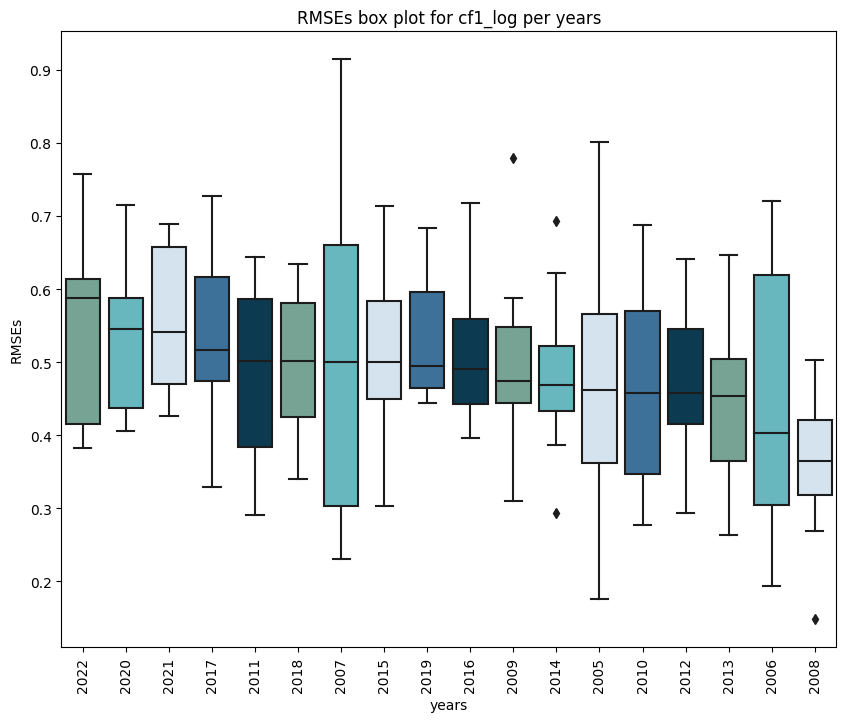

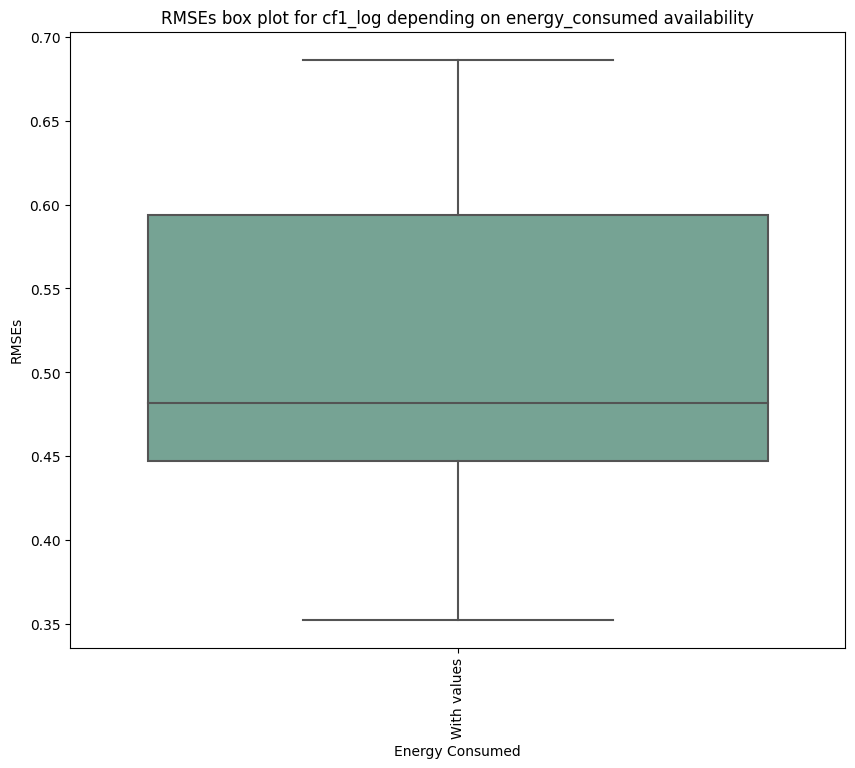

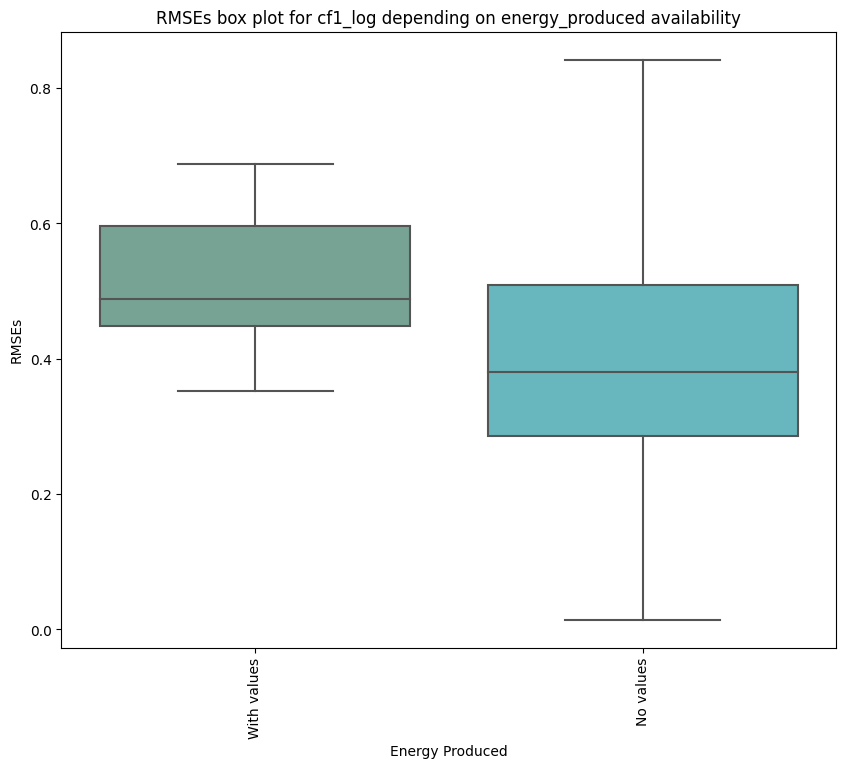

INFO:functions.training_pipeline:Training for target: cf3_log


Using pre created preprocessed files


INFO:functions.training_pipeline:Preprocessing done
INFO:functions.training_pipeline:Training model: xgboost
INFO:functions.training_pipeline:Training model: catboost
INFO:functions.training_pipeline:Training model: lgbm
INFO:functions.training_pipeline:Modelisation done
INFO:functions.training_pipeline:Elapsed time for target cf3_log: 18.77 seconds


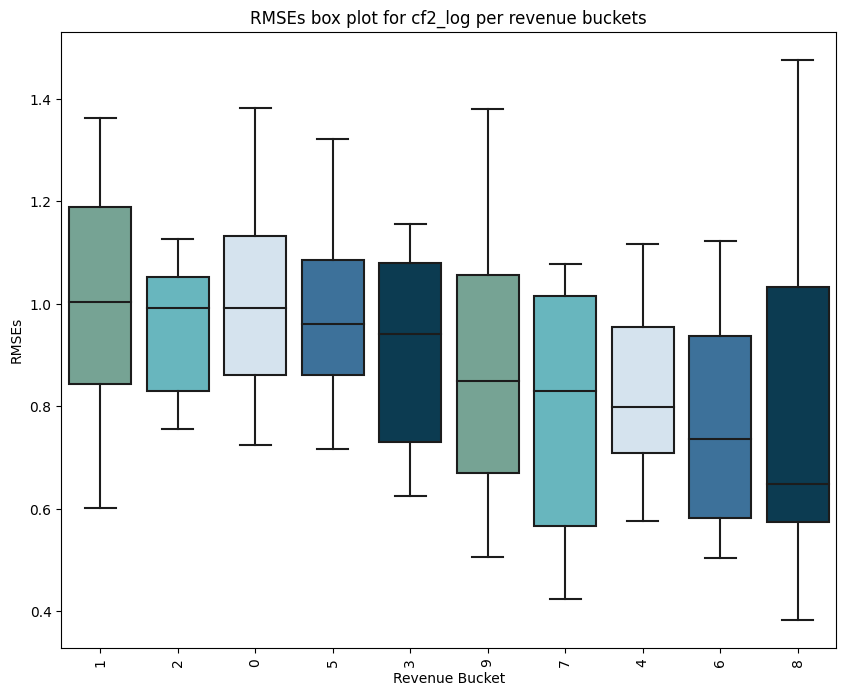

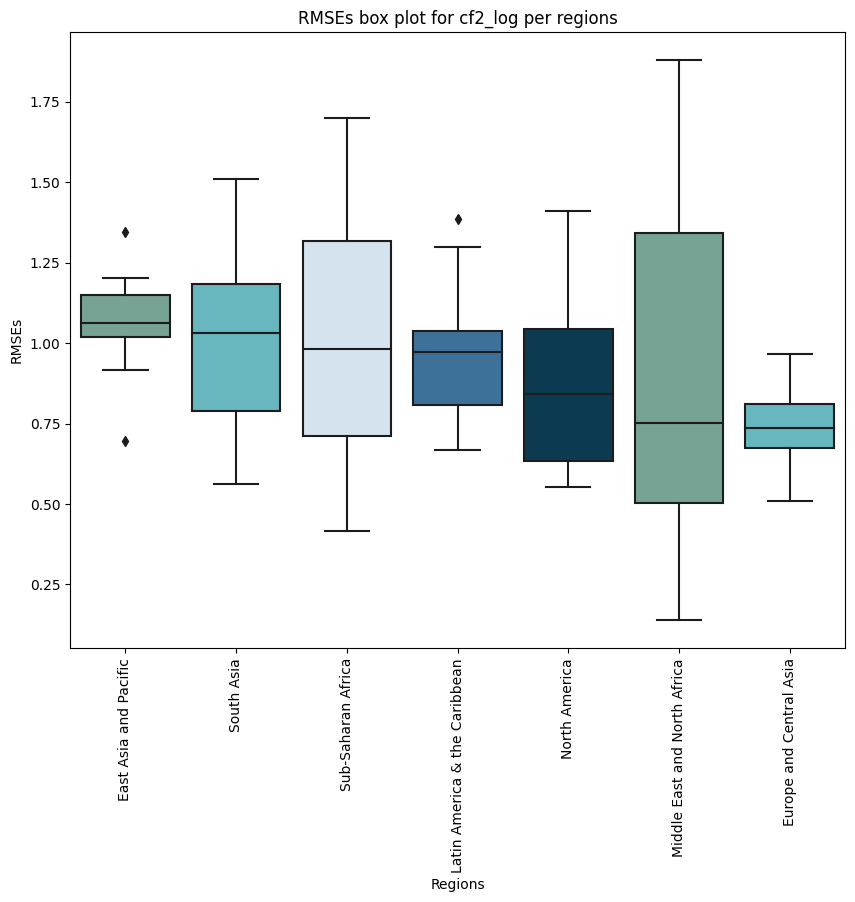

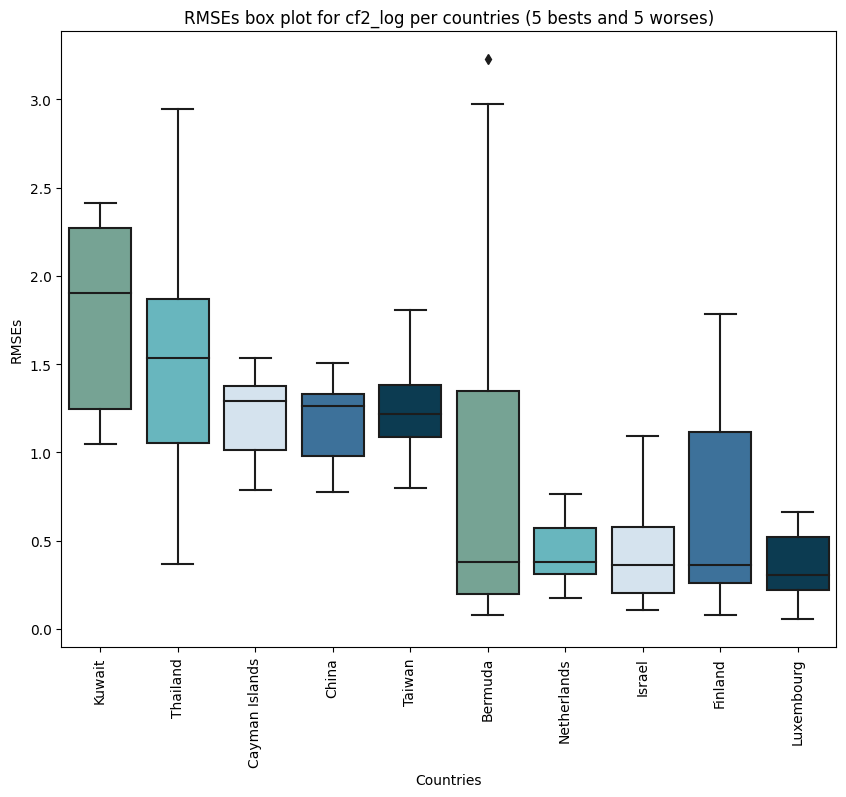

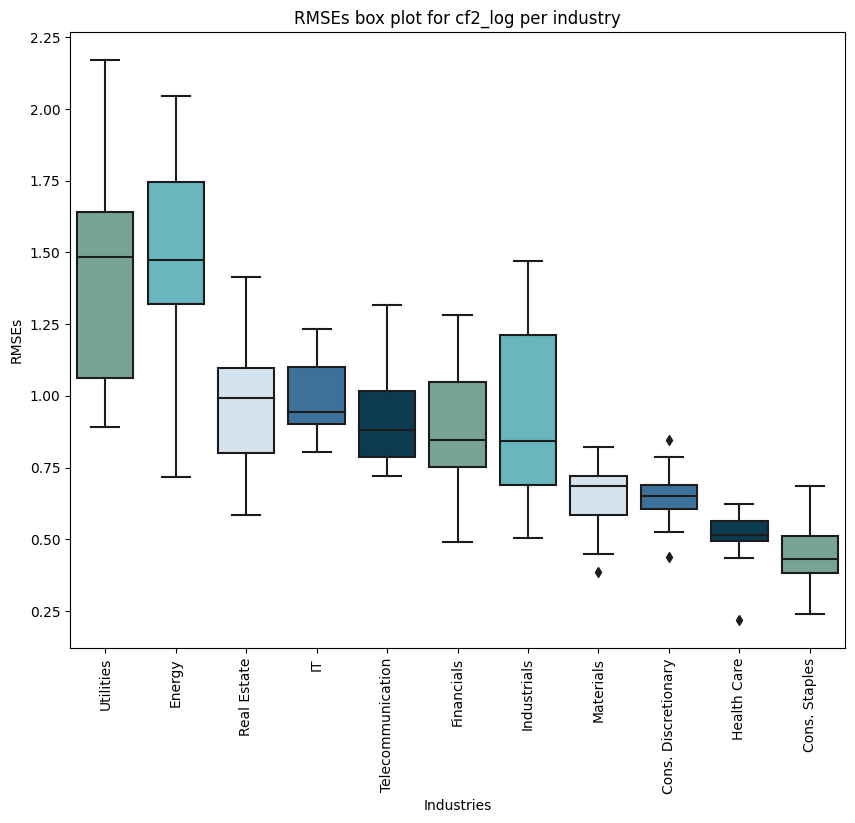

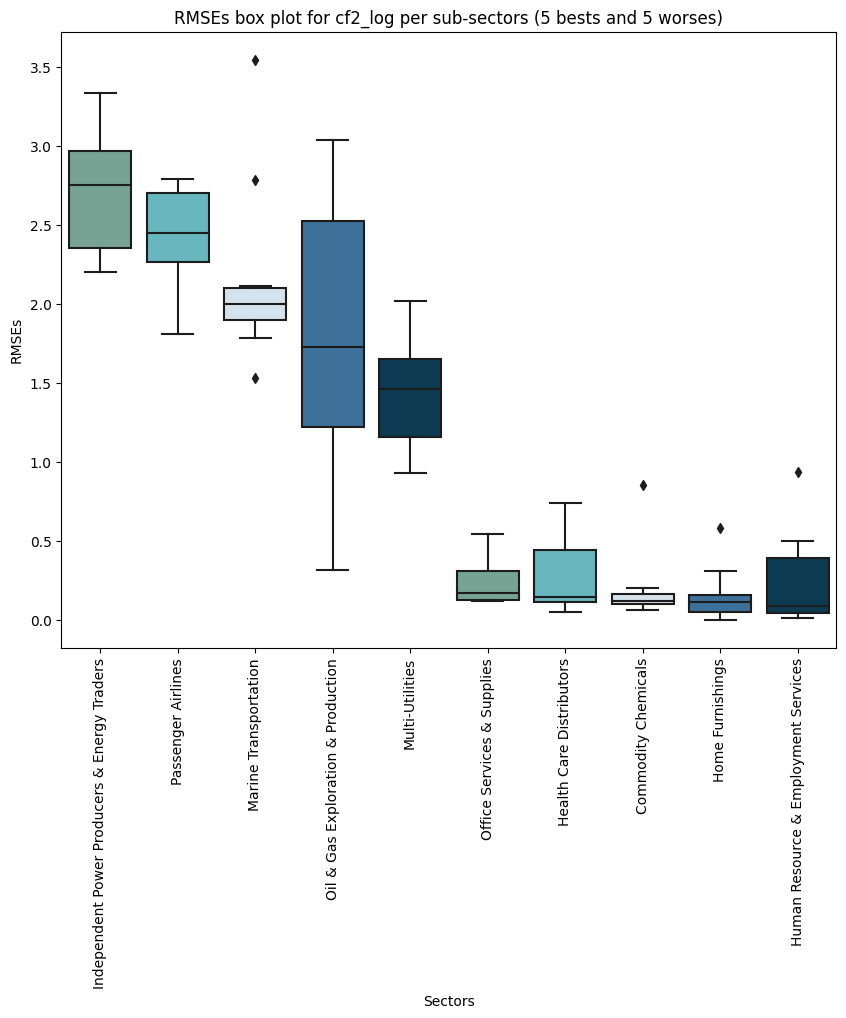

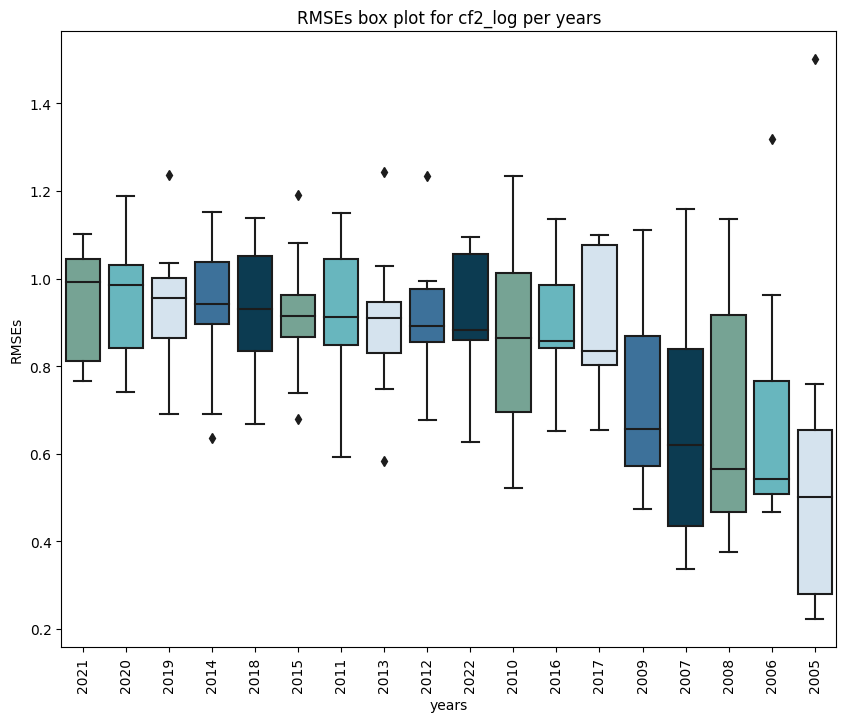

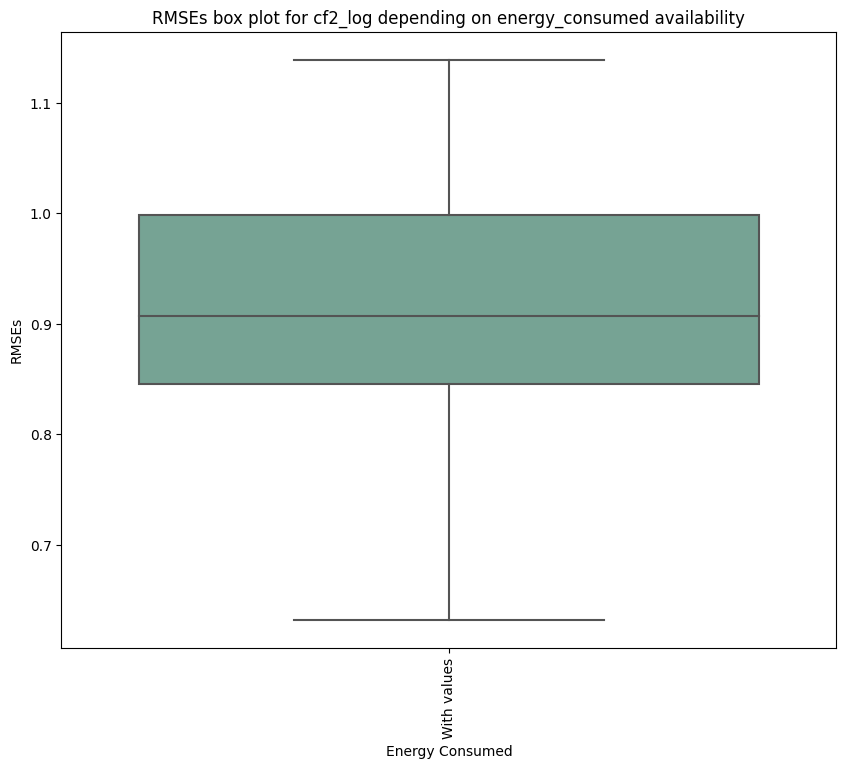

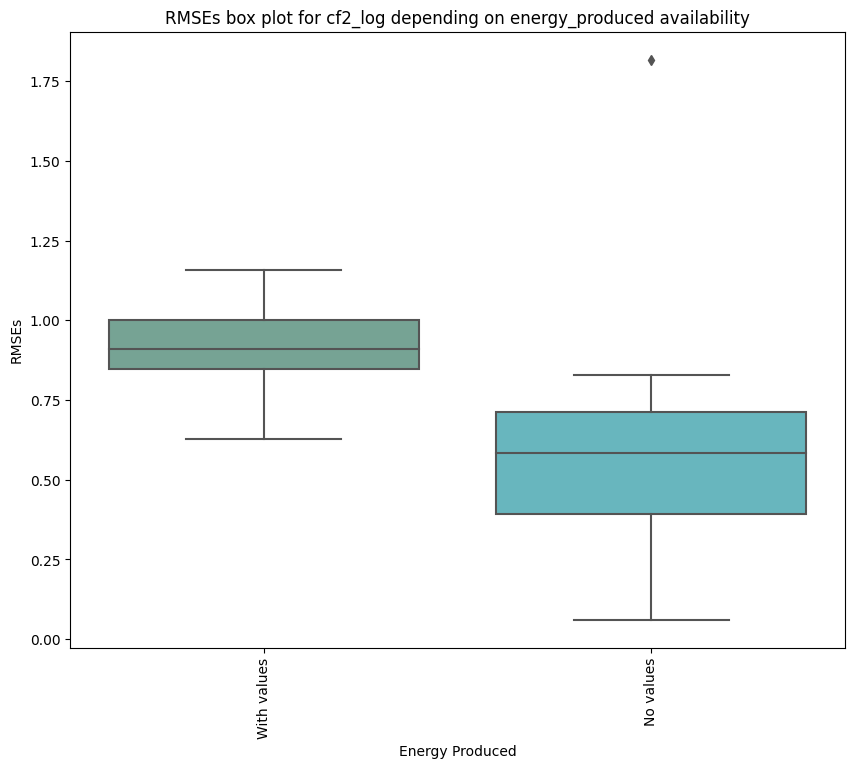

INFO:functions.training_pipeline:Training for target: cf123_log


Using pre created preprocessed files


INFO:functions.training_pipeline:Preprocessing done
INFO:functions.training_pipeline:Training model: xgboost
INFO:functions.training_pipeline:Training model: catboost
INFO:functions.training_pipeline:Training model: lgbm
INFO:functions.training_pipeline:Modelisation done
INFO:functions.training_pipeline:Elapsed time for target cf123_log: 17.09 seconds


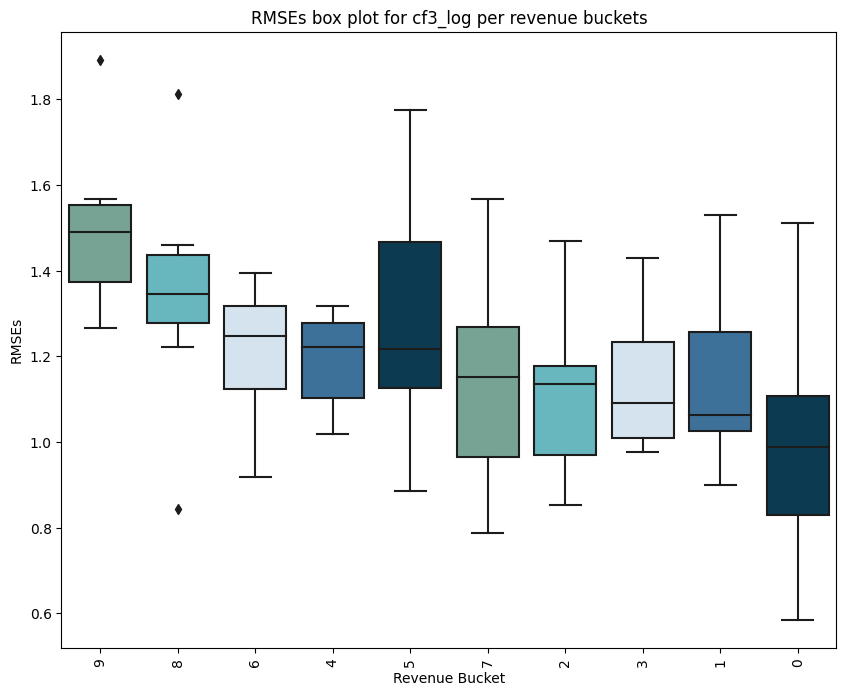

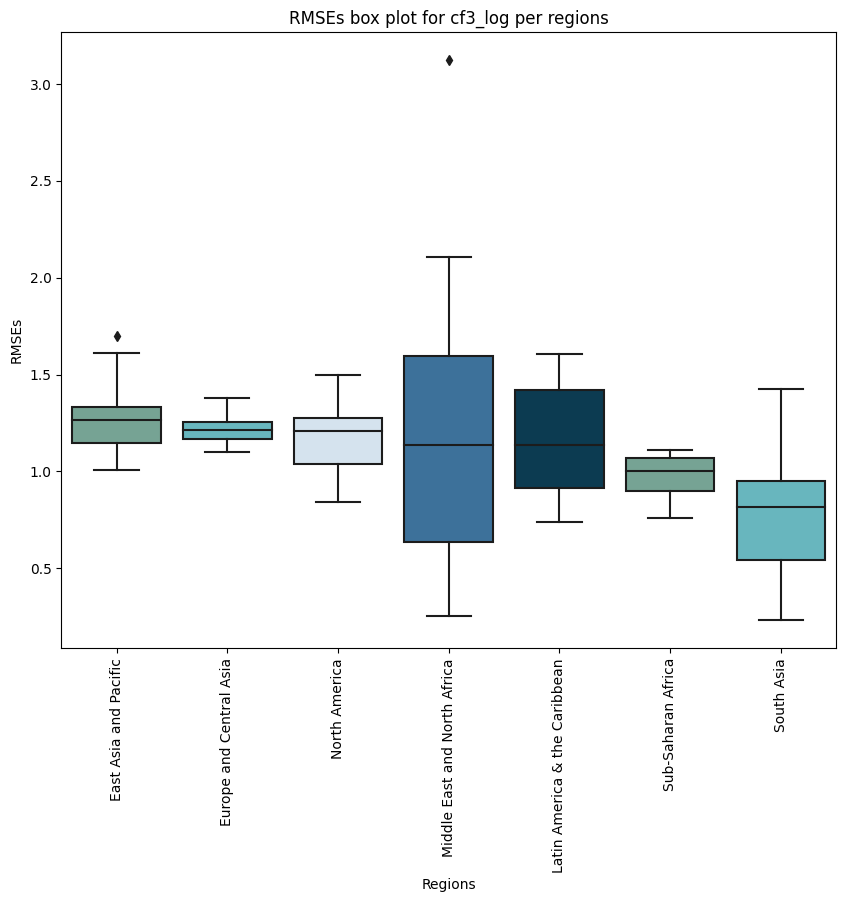

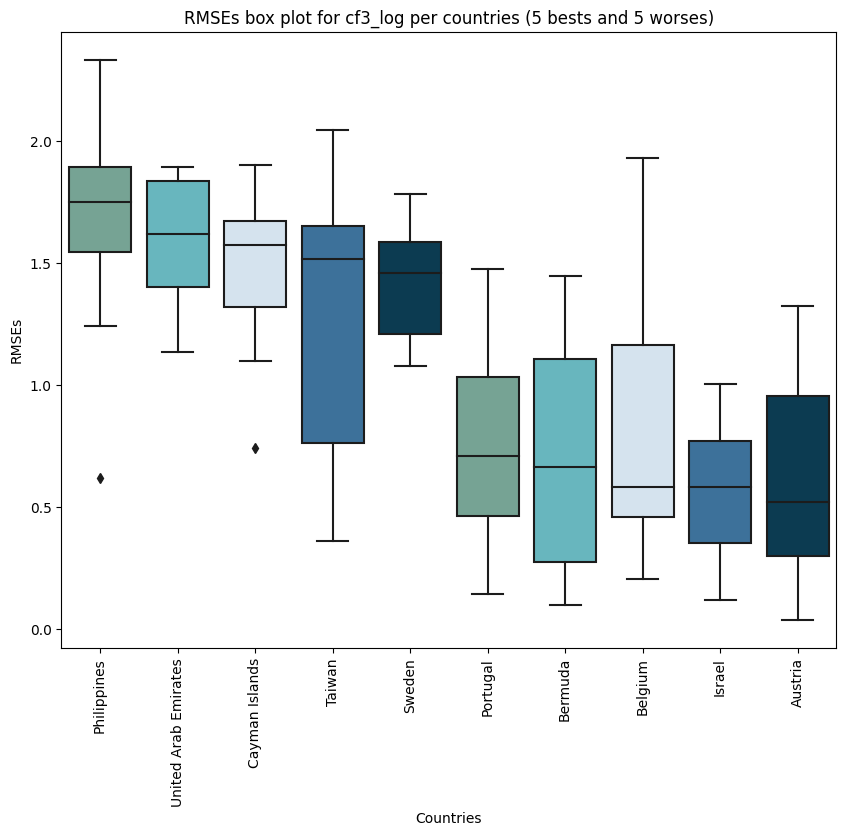

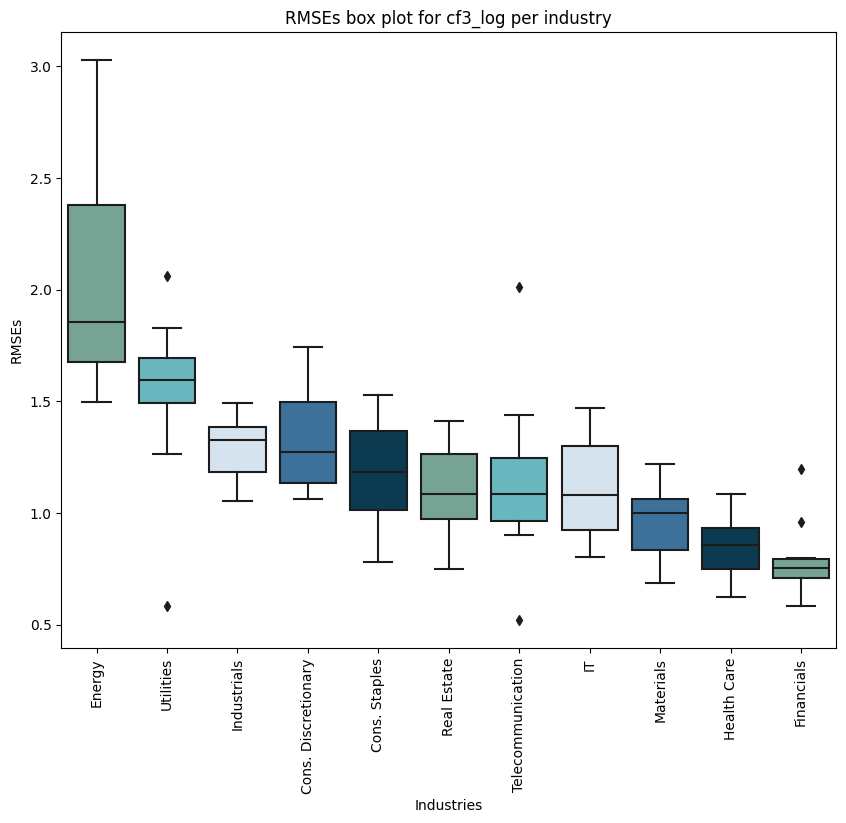

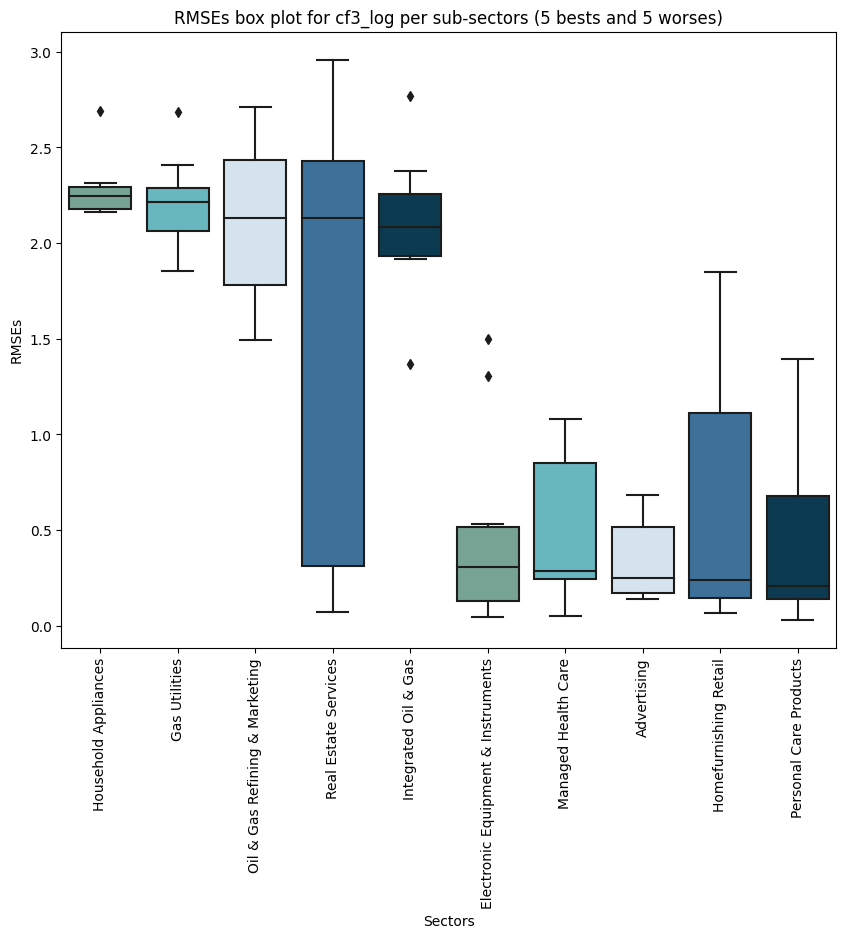

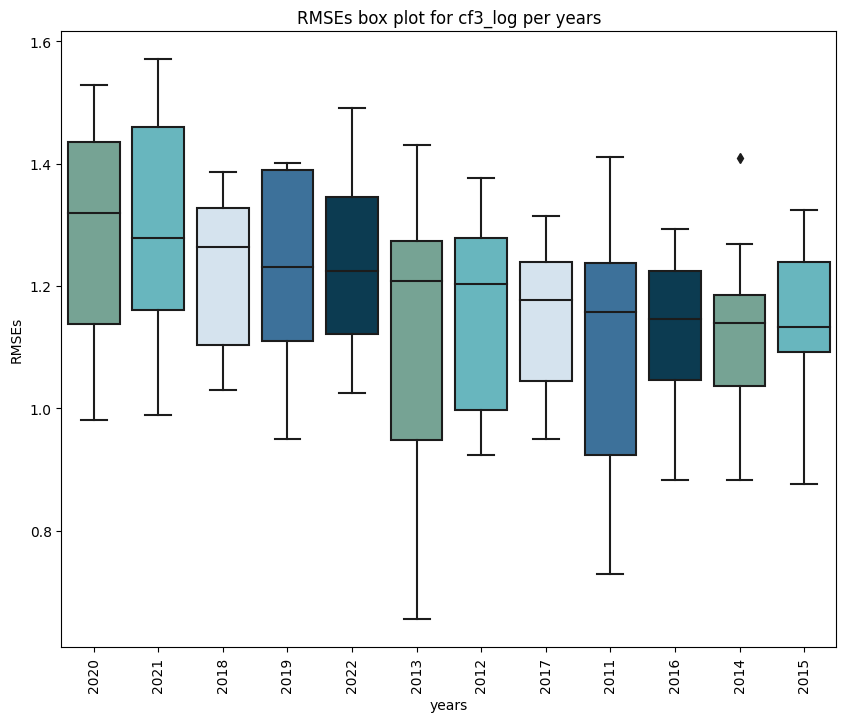

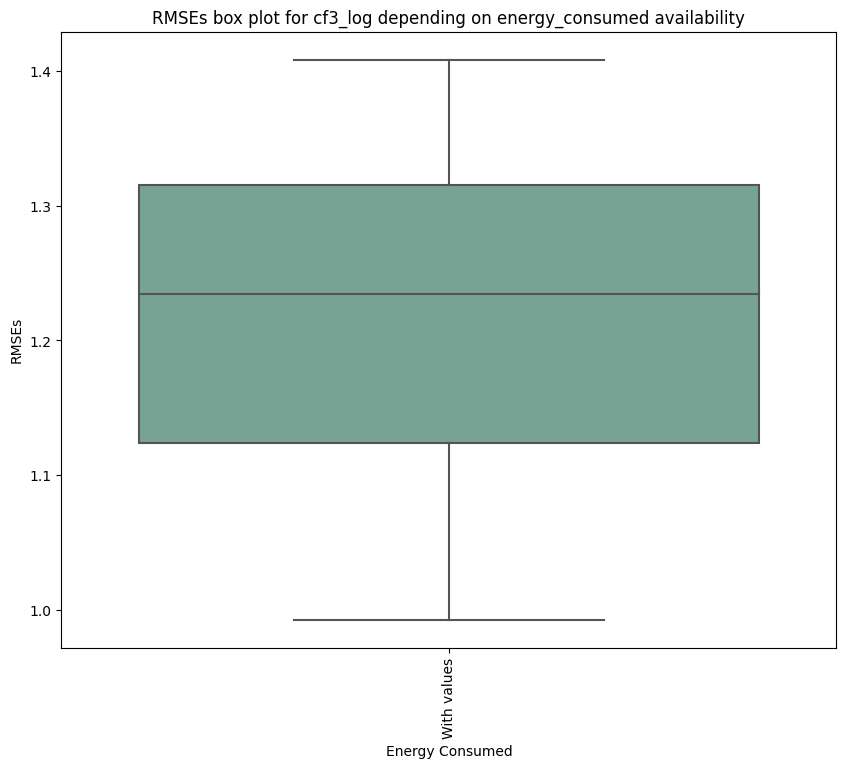

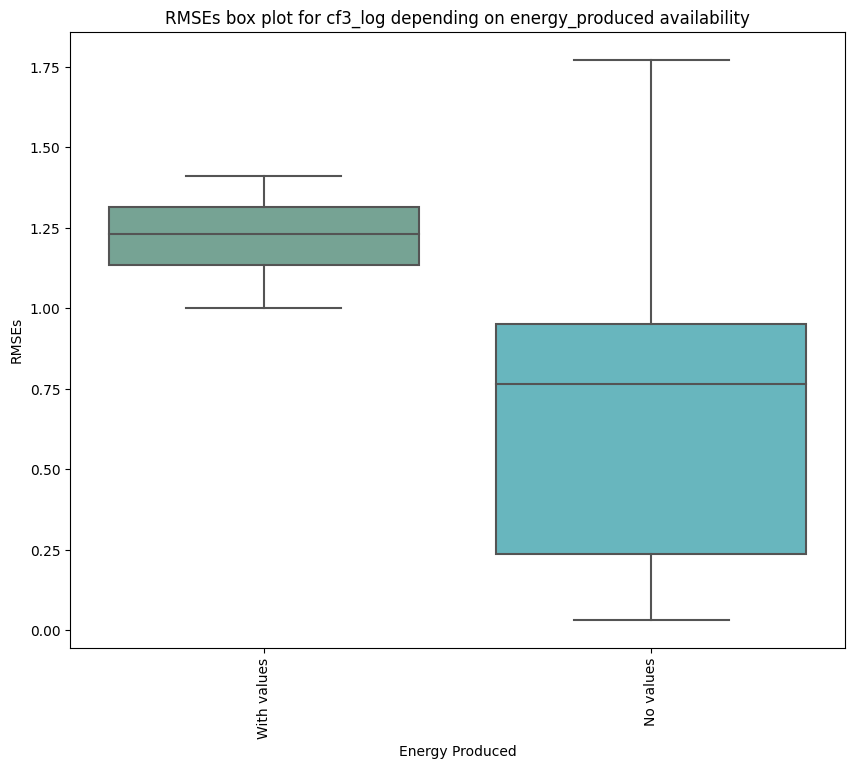

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

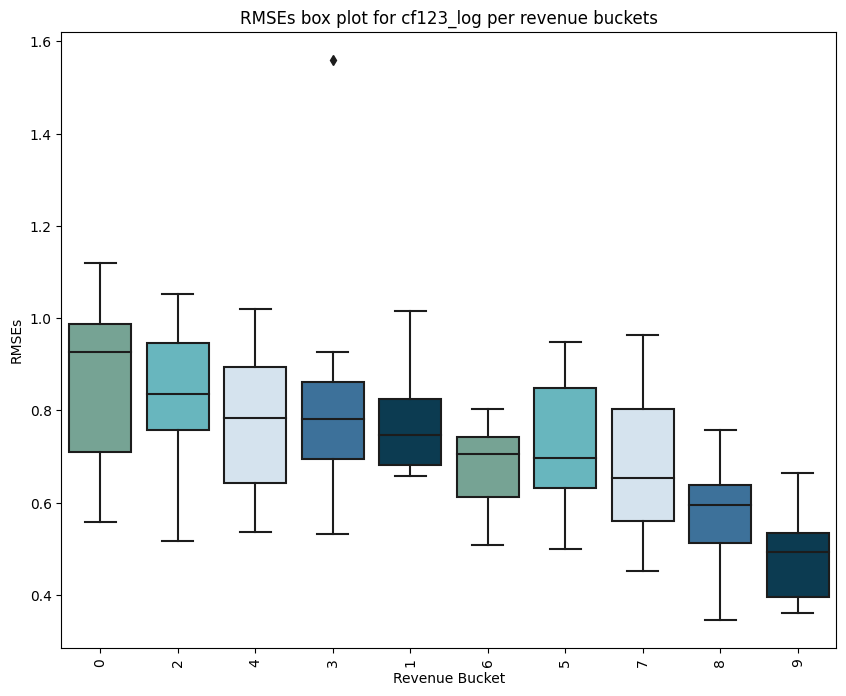

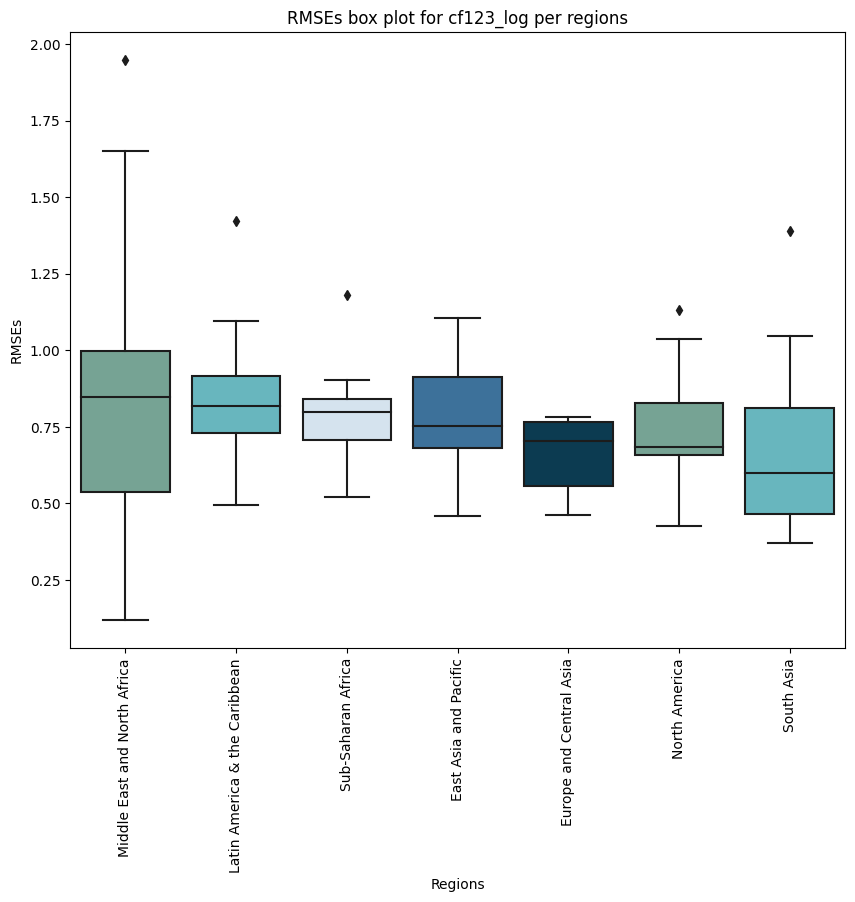

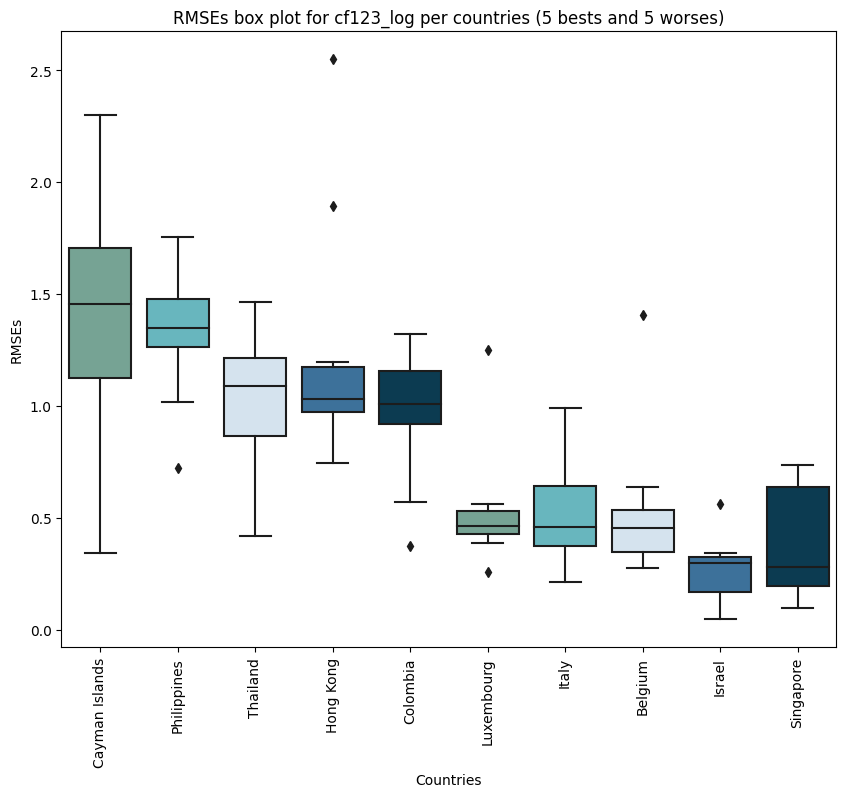

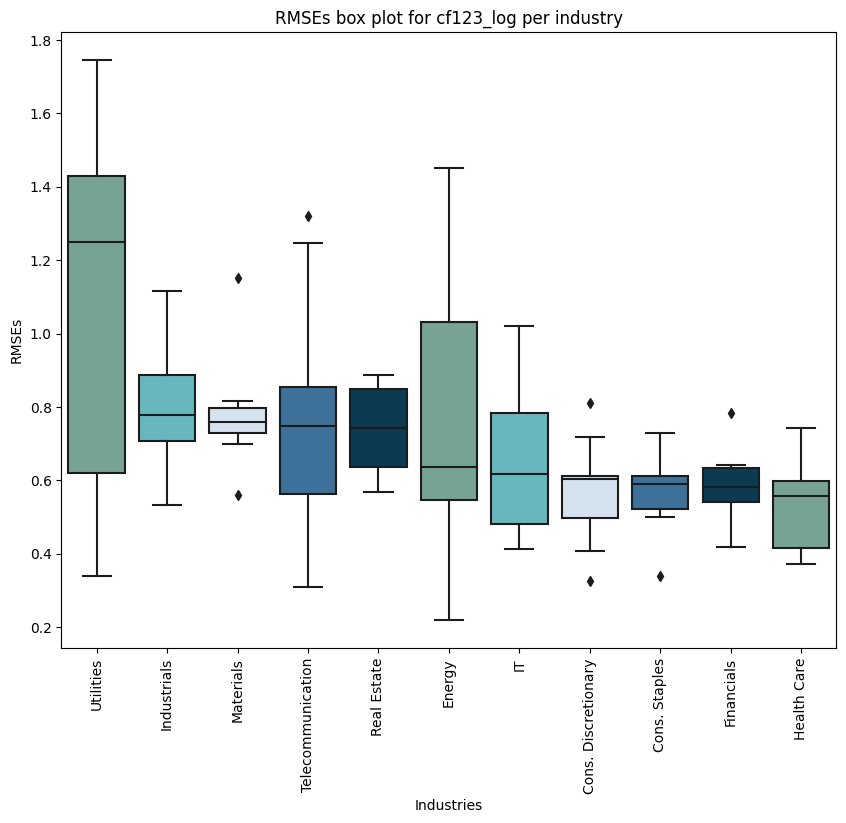

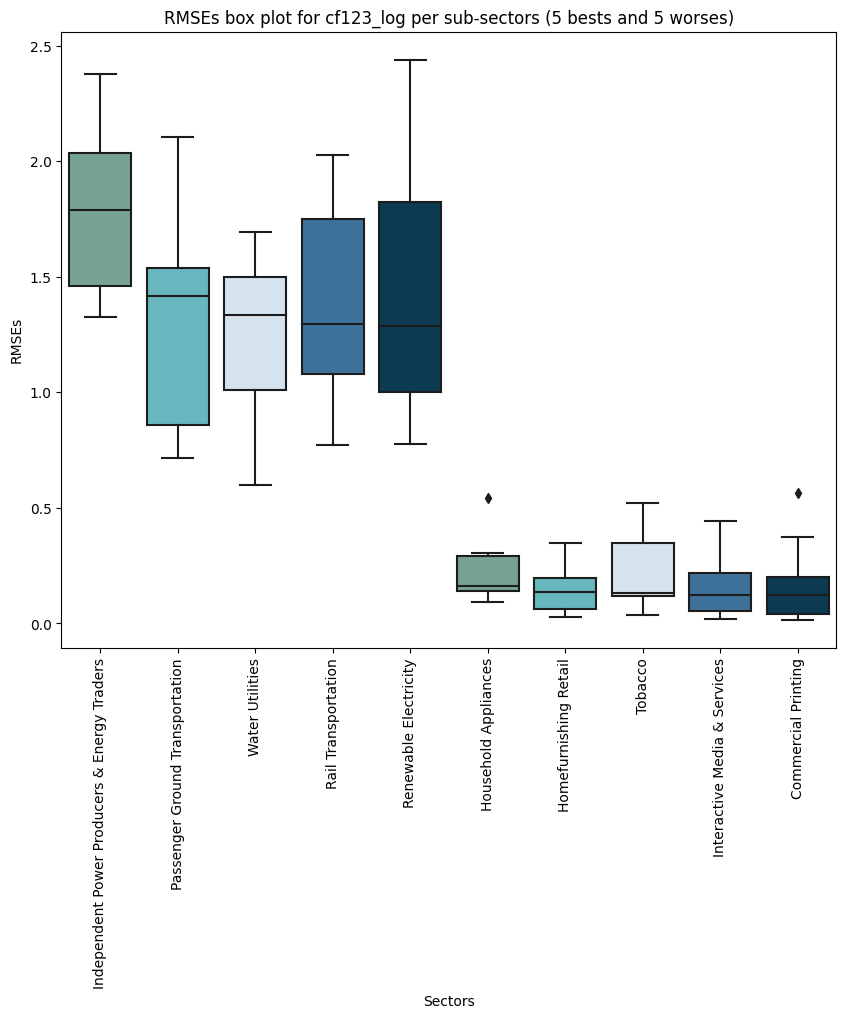

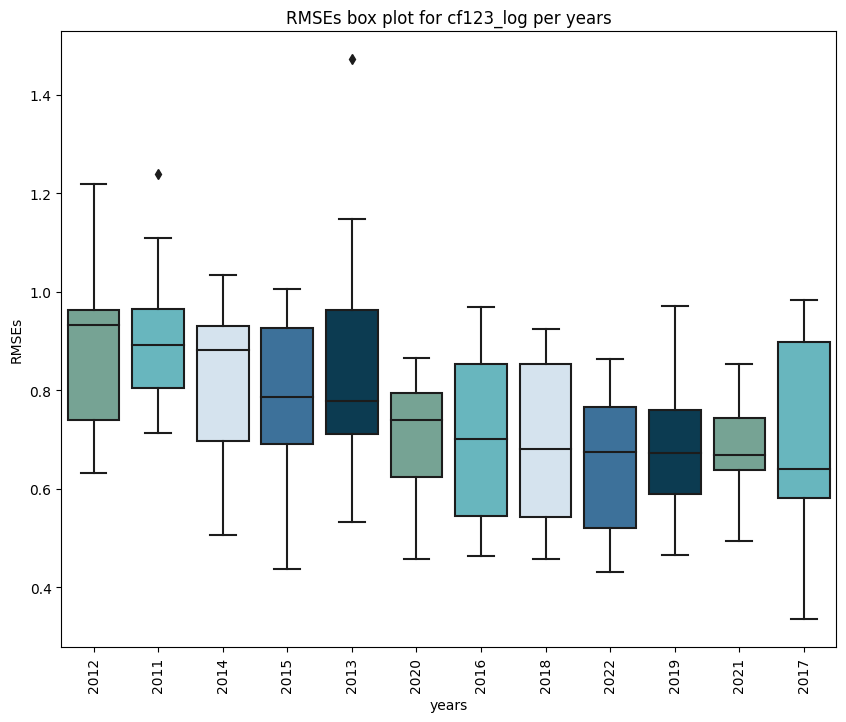

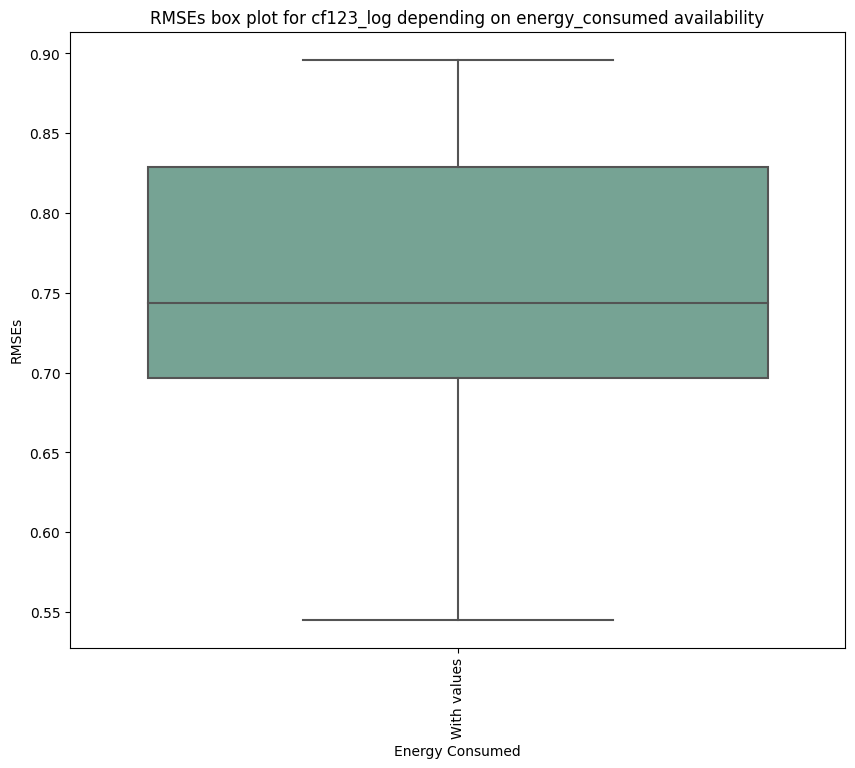

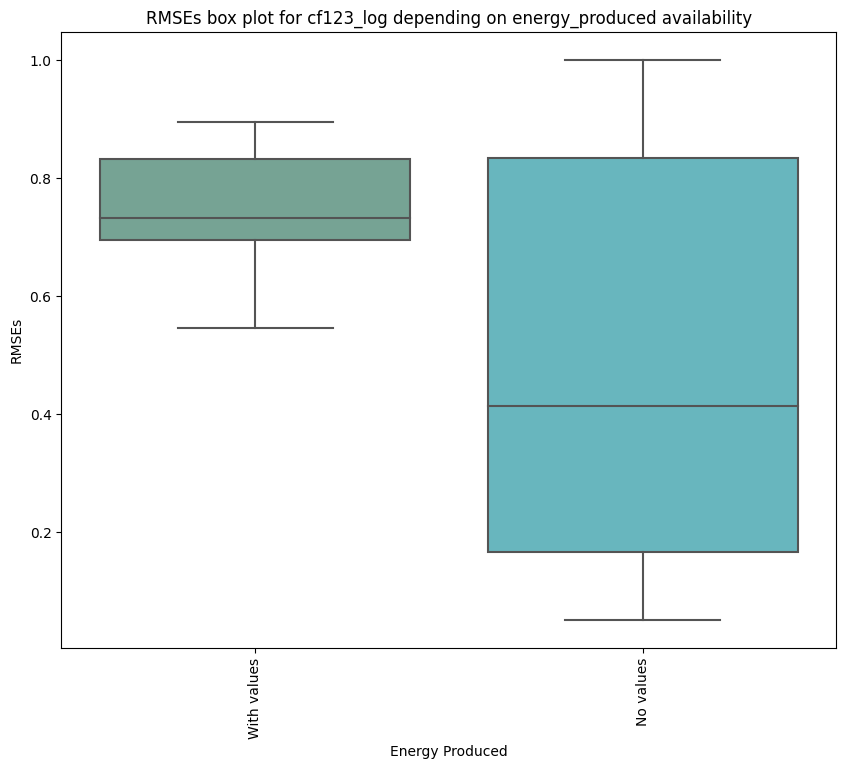

In [4]:
best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    path_benchmark=path_benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot=path_plot,
    targets=targets,
    models=models,
    summary_final=summary_final,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes=estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    restricted_features=restricted_features,
    save=save,
)

In [5]:
best_scores

[0.5233991620098789, 0.40811509811421237, 0.85109105089482, 0.5229286278975259]

# Model application

In [6]:
from functions.apply_model import apply_model_on_raw_data

In [7]:
raw_dataset = load_data(path_rawdata, filter_outliers=False, save=False)
estimations = apply_model_on_raw_data(raw_dataset,
    path_intermediary=path_intermediary,
    path_models=path_models,
    path_results=path_results,
    save=False
)
estimations

,company_id,fiscal_year,isin,ticker,gics_name,cf1_e,cf2_e,cf3_e,cf123_e,cf1_e + cf2_e + cf3_e
0,AIAS.CY,2018,CY0005200213,AIAS,Asset Management & Custody Banks,3232.605543,10456.608366,3627.510636,157965.138415,175281.862960
1,AIAS.CY,2016,CY0005200213,AIAS,Asset Management & Custody Banks,3425.518528,13788.535161,3013.035105,169686.766596,189913.855390
2,AIAS.CY,2015,CY0005200213,AIAS,Asset Management & Custody Banks,3793.593974,13956.877683,2619.482832,189650.152082,210020.106571
3,AIAS.CY,2011,CY0005200213,AIAS,Asset Management & Custody Banks,5603.914235,31696.112435,12319.017009,142397.899593,192016.943272
4,AIAS.CY,2010,CY0005200213,AIAS,Asset Management & Custody Banks,4922.338543,29299.558036,2777.827345,289517.795121,326517.519044
...,...,...,...,...,...,...,...,...,...,...
596972,PBYI.OQ,2021,US74587V1070,PBYI,Biotechnology,3313.861054,7071.998611,10358.662173,68068.031232,88812.553069
596973,PBYI.OQ,2020,US74587V1070,PBYI,Biotechnology,4006.983950,6233.202577,11562.564790,62383.504215,84186.255533
596974,PBYI.OQ,2019,US74587V1070,PBYI,Biotechnology,6030.167131,9878.256546,9153.767029,56863.434744,81925.625451
596975,PBYI.OQ,2018,US74587V1070,PBYI,Biotechnology,5266.231295,10438.365112,8452.854401,73390.822508,97548.273315
